In [54]:
import pandas as pd

df = pd.read_csv("data/df_201321_with_202021_predicted.csv")

In [55]:
df = df.sort_values(by=['year'])

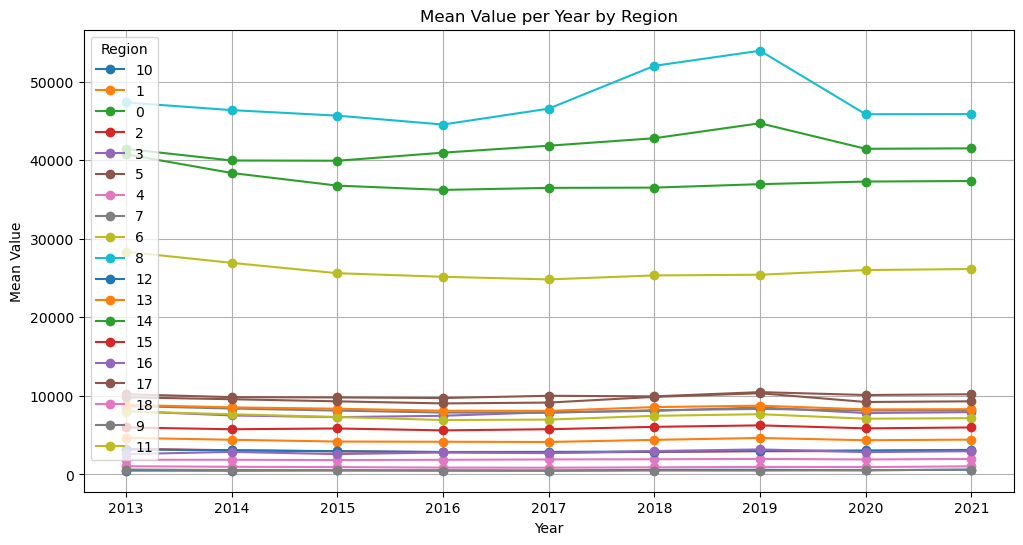

In [59]:
import pandas as pd
import matplotlib.pyplot as plt


# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Graficar los datos para cada región
for region in df['region'].unique():
    region_data = df[df['region'] == region]
    mean_values_per_year = region_data.groupby('year')['value'].mean().reset_index()
    plt.plot(mean_values_per_year['year'], mean_values_per_year['value'], marker='o', linestyle='-', label=region)

# Configurar etiquetas y título
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.title('Mean Value per Year by Region')
plt.legend(title='Region')
plt.grid(True)

# Mostrar el gráfico
plt.show()


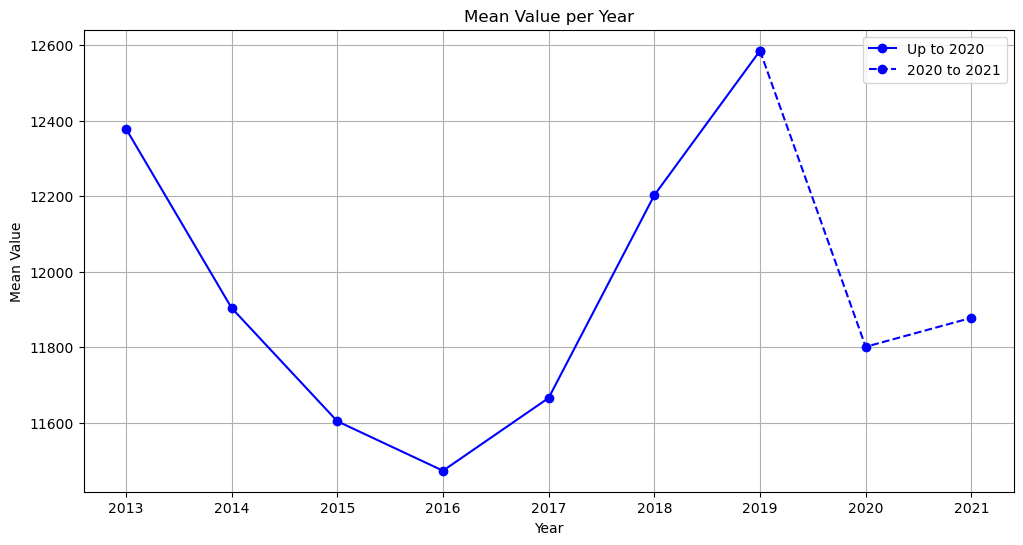

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))
# Calcular el valor medio por año
mean_values_per_year = df.groupby('year')['value'].mean().reset_index()
# Dividir los datos en dos partes: hasta 2019 y desde 2019 a 2020
years_up_to_2019 = mean_values_per_year[mean_values_per_year['year'] <= 2019]
years_2019_to_2020 = mean_values_per_year[(mean_values_per_year['year'] >= 2019) & (mean_values_per_year['year'] <= 2021)]
# Graficar los datos hasta 2019 con línea sólida
plt.plot(years_up_to_2019['year'], years_up_to_2019['value'], marker='o', linestyle='-', color='b', label='Up to 2020')
# Graficar los datos de 2019 a 2020 con línea de puntos
plt.plot(years_2019_to_2020['year'], years_2019_to_2020['value'], marker='o', linestyle='--', color='b', label='2020 to 2021')
# Configurar etiquetas y título
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.title('Mean Value per Year')
plt.grid(True)
plt.legend()
# Mostrar el gráfico
plt.show()

In [53]:
df

,year,region,latitude,longitude,population,variable,value,1_against_people_indicator,2_against_freedom_indicator,3_sexual_freedom_indicator,4_family_relationships_indicator,5_property_crimes_indicator,6_collective_security_indicator,7_forgeries_indicator,8_public_administration_indicator,9_justice_administration_indicator,Values_year_PCA,values_year_minus_1,values_year_minus_2,values_year_minus_3
1538,2013,10,35.2930,-2.9387,83679.0,9_justice_administration,43.000000,0,0,0,0,0,0,0,0,1,NaN,69.0,67.0,70.0
1122,2013,1,41.6488,-0.8891,1347150.0,6_collective_security,1225.000000,0,0,0,0,0,1,0,0,0,NaN,1411.0,1640.0,1380.0
1121,2013,0,37.3873,-5.9869,8440300.0,6_collective_security,16119.000000,0,0,0,0,0,1,0,0,0,NaN,17340.0,19296.0,16049.0
456,2013,0,37.3873,-5.9869,8440300.0,1_against_people,56840.000000,1,0,0,0,0,0,0,0,0,NaN,59894.0,64275.0,63795.0
457,2013,1,41.6488,-0.8891,1347150.0,1_against_people,6330.000000,1,0,0,0,0,0,0,0,0,NaN,5987.0,6848.0,6752.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,2021,1,41.6488,-0.8891,1319291.0,4_family_relationships,215.155833,0,0,0,1,0,0,0,0,0,-0.453639,NaN,NaN,NaN
230,2021,2,43.3619,-5.8494,1022800.0,4_family_relationships,181.752778,0,0,0,1,0,0,0,0,0,-0.455926,NaN,NaN,NaN
231,2021,3,39.5712,2.6466,1149460.0,4_family_relationships,259.555833,0,0,0,1,0,0,0,0,0,-0.453169,NaN,NaN,NaN
223,2021,16,42.6954,-1.6761,654214.0,3_sexual_freedom,303.079167,0,0,1,0,0,0,0,0,0,-0.450611,NaN,NaN,NaN


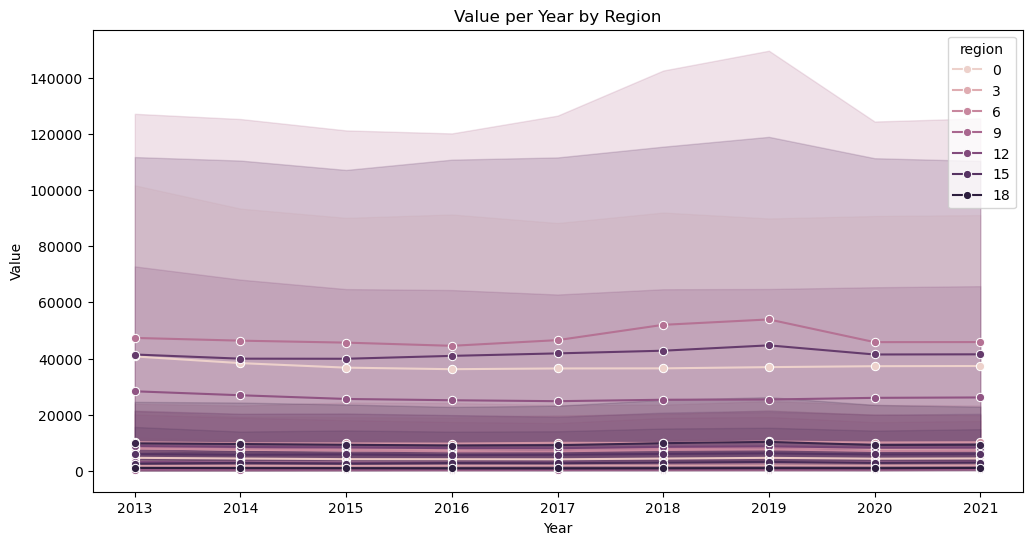

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Graficar los datos usando seaborn
sns.lineplot(data=df, x='year', y='value', hue='region', marker='o')

# Configurar etiquetas y título
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Value per Year by Region')

# Mostrar el gráfico
plt.show()


In [52]:
import pandas as pd
import folium
from folium.plugins import HeatMap


# Asegúrate de que las columnas de latitud y longitud sean float
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

# Crear un mapa base centrado en la ubicación promedio
map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=6)

# Preparar datos para el HeatMap
heat_data = [[row['latitude'], row['longitude'], row['value']] for index, row in df.iterrows()]

# Agregar HeatMap al mapa base
HeatMap(heat_data).add_to(m)

# Guardar el mapa en un archivo HTML y mostrarlo
m.save('heatmap.html')

# Para mostrar en Jupyter Notebook (opcional)
# m
